Potential resource(s):
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

# Mental Health in Tech Project

## Data Sets

[OSMI Survey on Mental Health in the Tech Workplace in 2014](https://www.kaggle.com/osmi/mental-health-in-tech-survey) 

["Ongoing" OSMI survey from 2016](https://data.world/kittybot/osmi-mental-health-tech-2016)


## Questions

What factors are most signficant in influencing whether or not a person believes disclosing a mental health issue would have negative consequences?

Can we predict, based on publicly available features of a person and company, whether that person is likely to beleive disclosing a mental health issue would be harmful for their career?

## Exploring and Cleaning 2014 Data

In [1]:
import pandas as pd
% matplotlib inline

In [2]:
df14 = pd.read_csv("./datasets/2014/mental-health-in-tech-2014.csv")
print df14.shape
# df14.head(3)

(1259, 27)


In [3]:
# standardize columns to have lowercase names
df14.rename(columns={'Age': 'age', 'Gender': 'gender', 'Country': 'country', 'Timestamp': 'timestamp'}, inplace=True)
# replace confusing no_employees column name
df14.rename(columns={'no_employees': 'num_employees'}, inplace=True)
df14.head(3)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [4]:
df_original = pd.read_csv("./datasets/2014/osmi-mental-health-in-tech-original.csv")
print df_original.shape
# print df_original.columns   # original questions/fields

(1259, 27)


<details><summary> Click to expand all **original questions/fields** </summary>
    
- Timestamp   
- Age  
- Gender   
- Country  
- If you live in the United States, which state or territory do you live in?  
- Are you self-employed?  
- Do you have a family history of mental illness?  
- Have you sought treatment for a mental health condition?  
- If you have a mental health condition, do you feel that it interferes with your work?  
- How many employees does your company or organization have?  
- Do you work remotely (outside of an office) at least 50% of the time?  
- Is your employer primarily a tech company/organization?  
- Does your employer provide mental health benefits?  
- Do you know the options for mental health care your employer provides?  
- Has your employer ever discussed mental health as part of an employee wellness program?  
- Does your employer provide resources to learn more about mental health issues and how to seek help?  
- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  
- How easy is it for you to take medical leave for a mental health condition?  
- Do you think that discussing a mental health issue with your employer would have negative consequences?  
- Do you think that discussing a physical health issue with your employer would have negative consequences?  
- Would you be willing to discuss a mental health issue with your coworkers?  
- Would you be willing to discuss a mental health issue with your direct supervisor(s)?  
- Would you bring up a mental health issue with a potential employer in an interview?  
- Would you bring up a physical health issue with a potential employer in an interview?  
- Do you feel that your employer takes mental health as seriously as physical health?  
- Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  
- Any additional notes or comments
</details>

In [5]:
# create reference to look up questions based on column names
column_names = df14.columns
questions = df_original.columns
col_question_map = { 
    column_names[i]: questions[i] for i in range(df_original.shape[1]-1) 
}

# for example:
col_question_map#['mental_vs_physical']


{'age': 'Age',
 'anonymity': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?',
 'benefits': 'Does your employer provide mental health benefits?',
 'care_options': 'Do you know the options for mental health care your employer provides?',
 'country': 'Country',
 'coworkers': 'Would you be willing to discuss a mental health issue with your coworkers?',
 'family_history': 'Do you have a family history of mental illness?',
 'gender': 'Gender',
 'leave': 'How easy is it for you to take medical leave for a mental health condition?',
 'mental_health_consequence': 'Do you think that discussing a mental health issue with your employer would have negative consequences?',
 'mental_health_interview': 'Would you bring up a mental health issue with a potential employer in an interview?',
 'mental_vs_physical': 'Do you feel that your employer takes mental health as seriously as physical health?',
 'num_employees': 'How many employee

#### Quick NaN Check


In [6]:
# quick NaN check
counts = df14.count()
numrows = df14.shape[0]
for col in df14.columns:
    if counts[col] != numrows:
        print "{0} has {1} NaNs".format(col, numrows-counts[col])

state has 515 NaNs
self_employed has 18 NaNs
work_interfere has 264 NaNs
comments has 1095 NaNs


In [7]:
df14[df14['self_employed'].isnull()]

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### Invalid ages

Ages range from `-1726` to `99999999999`.  This is supposed to be a survey of working adults, so values under 16 and over 80 can be ignored.

In [8]:
ages = df14.age.unique()
ages.sort()
print ages

[      -1726         -29          -1           5           8          11
          18          19          20          21          22          23
          24          25          26          27          28          29
          30          31          32          33          34          35
          36          37          38          39          40          41
          42          43          44          45          46          47
          48          49          50          51          53          54
          55          56          57          58          60          61
          62          65          72         329 99999999999]


In [9]:
nan = float('NaN')

df14.age = df14.age.map(lambda x: nan if (x<16 or x>80) else x)

In [10]:
ages = df14.age.unique()
ages.sort()
print ages

[ 18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  53.  54.  55.  56.  57.  58.  60.  61.  62.  65.  72.
  nan]


### Gender responses

Gender responses seem to be strings entered by the user. To create a more manageable set of variables, I examine all the gender responses and categorize them into `female`, `male`, or `other`.  

Note (and it's noted in a comment in the code) that trans men and women map to `male` and `female` categories, respectively. Gender identity can have an impact on feelings of being stigmatized, so this might be a decision to explore further. 

In [11]:
# create dictionary to organize dummy data frames throughout
dummy_dfs = {}

In [12]:
print df14.gender.unique()

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [13]:
# categorize gender responses into male, female, other based on response
def categorize_gender(gender_response):
    gender_response = gender_response.strip().lower()
    
    # caution - removing data about gender identity that may 
        # be correlated with mental health or feelings of being stigmatized
    male_responses = set(['male', 'm', 'man', 'cis male', 'male (cis)',
                          'male (trans)', 'cis man',
                          'mal', 'mail', 'maile', 'make', 'msle', 'malr'])
    
    # caution - removing data about gender identity that may 
        # be correlated with mental health or feelings of being stigmatized
    female_responses = set(['female', 'f', 'woman', 'female (cis)', 
                            'trans-female', 'trans woman', 'female (trans)', 
                            'cis-female/femme', 'cis female', 'trans-female', 
                            'femake', 'femail'])
    if gender_response in male_responses:
        return 'male'
    elif gender_response in female_responses:
        return 'female'
    else:
        return 'other'

# values mapped to 'other' for this data set:
#        ['male-ish', 'something kinda male?',
#        'queer/she/they', 'non-binary', 'nah', 'all', 'enby', 'fluid',
#        'genderqueer', 'androgyne', 'agender', 'guy (-ish) ^_^',
#        'male leaning androgynous', 'neuter', 'queer',
#        'a little about you', 'p',
#        'ostensibly male, unsure what that really means']

In [14]:
categorized_gender_responses = df14.gender.map(categorize_gender)

In [15]:
categorized_gender_responses.value_counts(dropna=False)

male      990
female    251
other      18
Name: gender, dtype: int64

In [16]:
dummy_dfs['gender'] = pd.get_dummies(categorized_gender_responses, prefix='gender')

In [17]:
df14.loc[:,'gender_category'] = categorized_gender_responses

In [18]:
df14[['gender', 'gender_category']].head(3)

,gender,gender_category
0,Female,female
1,M,male
2,Male,male


### Yes/no questions

Many of the survey questions are yes/no questions, but the data is currently stored as strings. I convert these to `1` for `Yes` and `0` for `No`.

Most of the columns with three reponses have `'Yes'`, `'No'`, and `'Maybe'`, `'Don't know'`, or some other meaningful third option.  Those will be one-hot coded with dummy variables later.

In [19]:
for col in df14.columns:
    col_uniq = df14[col].unique()
    if len(col_uniq) == 2:
        print col, col_uniq

family_history ['No' 'Yes']
treatment ['Yes' 'No']
remote_work ['No' 'Yes']
tech_company ['Yes' 'No']
obs_consequence ['No' 'Yes']


In [20]:
def yes_no_same(response):
    if response=='Yes' or response==1:
        return 1
    elif response=='No' or response==0:
        return 0
    else:
        return response

In [21]:
def yes_no_same_column(df, column_name):
    df[column_name] = df[column_name].map(yes_no_same)

In [22]:
two_opt_cols = ['family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
for col in two_opt_cols:
    yes_no_same_column(df14, col)

In [23]:
df14[two_opt_cols].head(3)

,family_history,treatment,remote_work,tech_company,obs_consequence
0,0,1,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0


### Yes/no/maybe and other three-option columns

Many of the survey questions have yes/no/maybe or other meaningful third choices.  These columns will need one-hot coding and dummy variables.

In [24]:
three_opt_cols = [col for col in df14.columns if len(df14[col].unique()) == 3]

for col in three_opt_cols:
    print col, df14[col].unique()

self_employed [nan 'Yes' 'No']
benefits ['Yes' "Don't know" 'No']
care_options ['Not sure' 'No' 'Yes']
wellness_program ['No' "Don't know" 'Yes']
seek_help ['Yes' "Don't know" 'No']
anonymity ['Yes' "Don't know" 'No']
mental_health_consequence ['No' 'Maybe' 'Yes']
phys_health_consequence ['No' 'Yes' 'Maybe']
coworkers ['Some of them' 'No' 'Yes']
supervisor ['Yes' 'No' 'Some of them']
mental_health_interview ['No' 'Yes' 'Maybe']
phys_health_interview ['Maybe' 'No' 'Yes']
mental_vs_physical ['Yes' "Don't know" 'No']
gender_category ['female' 'male' 'other']


The self-employed column is a special case with some missing values.

I considered removing the rows with `NaN` for `self_employed`, but the rest of the data on those rows seems fairly complete (a few have comments, which are otherwise rare in the dataset. 

Instead of treating self employed as a boolean (like the two-option columns) with some missing values, I'm going keep the `NaN` values and create dummies with them, similar to how the rest of the three-option columns are handled.

#### Self-Employed

In [25]:
print col_question_map['self_employed']
print df14['self_employed'].value_counts(dropna=False)

Are you self-employed?
No     1095
Yes     146
NaN      18
Name: self_employed, dtype: int64


In [26]:
def get_prefix(response):
    if type(response) != str:
        return response
    else:
        return response.lower().replace(" ", "_").replace("'", "")

In [27]:
df14['self_employed'] = df14['self_employed'].map(get_prefix)
print df14.self_employed.unique()
dummy_dfs['self_employed'] = pd.get_dummies(df14['self_employed'], prefix='self_employed', dummy_na=True)

[nan 'yes' 'no']


In [28]:
dummy_dfs['self_employed'].head(4)

,self_employed_no,self_employed_yes,self_employed_nan
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1


#### Care Options

In [29]:
print col_question_map['care_options']
print df14['care_options'].value_counts(dropna=False)

Do you know the options for mental health care your employer provides?
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


#### Other "Three Option" Columns

In [30]:
three_opt_cols

['self_employed',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'gender_category']

In [31]:
if three_opt_cols[0] == 'self_employed':
    three_opt_cols.pop(0)
for col in three_opt_cols:
    df14[col] = df14[col].map(get_prefix)
    print df14[col].unique()

['yes' 'dont_know' 'no']
['not_sure' 'no' 'yes']
['no' 'dont_know' 'yes']
['yes' 'dont_know' 'no']
['yes' 'dont_know' 'no']
['no' 'maybe' 'yes']
['no' 'yes' 'maybe']
['some_of_them' 'no' 'yes']
['yes' 'no' 'some_of_them']
['no' 'yes' 'maybe']
['maybe' 'no' 'yes']
['yes' 'dont_know' 'no']
['female' 'male' 'other']


In [32]:
for col in three_opt_cols:
    dummy_dfs[col] = pd.get_dummies(df14[col], prefix=col)

In [33]:
dummy_dfs.keys()

['wellness_program',
 'mental_vs_physical',
 'benefits',
 'seek_help',
 'gender',
 'mental_health_consequence',
 'care_options',
 'phys_health_interview',
 'coworkers',
 'self_employed',
 'anonymity',
 'supervisor',
 'mental_health_interview',
 'phys_health_consequence',
 'gender_category']

**At this point**, the `dummy_dfs` dictionary holds dummy variable sets for all three-option columns as well as `gender`.

In [34]:
dummy_dfs['gender']

,gender_female,gender_male,gender_other
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
7,0,1,0
8,1,0,0
9,0,1,0


### Other categorical variables

#### Country & State

In [59]:
countries = df14['country'].map(get_prefix)
print countries.head(3)
df14['country'].unique()

0    united_states
1    united_states
2           canada
Name: country, dtype: object


array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [36]:
dummy_dfs['country'] = pd.get_dummies(countries)
# dummy_dfs['country'].head(3)

In [37]:
dummy_dfs['state'] = pd.get_dummies(df14.state, prefix='state', dummy_na=True)
# dummy_dfs['state'].head(3)
# baseline is nan states

#### If you have a mental health condition, do you feel that it interferes with your work?

In [38]:
print col_question_map['work_interfere']
df14['work_interfere'].value_counts(dropna=False)

If you have a mental health condition, do you feel that it interferes with your work?


Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [39]:
df14['work_interfere'] = df14['work_interfere'].map(get_prefix)
# df14['work_interfere'].value_counts(dropna=False)

In [40]:
dummy_dfs['work_interfere'] = pd.get_dummies(
    df14.work_interfere, 
    prefix='work_interfere',
    dummy_na=True   # singificant amount of rows with this data missing
)

#### How many employees does your company or organization have?

In [41]:
print col_question_map['num_employees']
df14.num_employees.value_counts(dropna=False)

How many employees does your company or organization have?


6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: num_employees, dtype: int64

In [42]:
df14.num_employees = df14.num_employees.map(lambda x: '1000+' if x=='More than 1000' else x)
print df14.num_employees.unique()

['6-25' '1000+' '26-100' '100-500' '1-5' '500-1000']


In [43]:
dummy_dfs['num_employees'] = pd.get_dummies(df14.num_employees, prefix='num_employees')
# dummy_dfs['num_employees'].head(3)

#### How easy is it for you to take medical leave for a mental health condition?

In [44]:
print col_question_map['leave']
df14.leave.value_counts(dropna=False)

How easy is it for you to take medical leave for a mental health condition?


Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [45]:
df14.leave = df14.leave.map(get_prefix)
print df14.leave.unique()

['somewhat_easy' 'dont_know' 'somewhat_difficult' 'very_difficult'
 'very_easy']


In [46]:
dummy_dfs['leave'] = pd.get_dummies(df14.leave, prefix='leave')
# dummy_dfs['leave'].head(2)

### Timestamps

Timestamps are time series data. Mostly ignoring them for now.

In [47]:
first = df14.timestamp.min()
last = df14.timestamp.max()
print first
print last

2014-08-27 11:29:31
2016-02-01 23:04:31


In [48]:
first = pd.to_datetime(first)
last = pd.to_datetime(last)
last - first

Timedelta('523 days 11:35:00')

In [49]:
df14['timestamp'] = df14['timestamp'].map(pd.to_datetime)

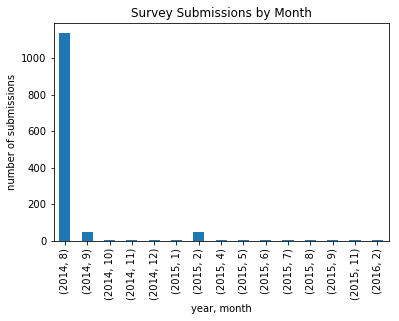

In [50]:
# using family_history (which has no NaNs as a standin for total submissions)
submit_date_counts = df14['family_history'].groupby([df14['timestamp'].dt.year, df14['timestamp'].dt.month]).count()
p = submit_date_counts.plot(kind='bar', title='Survey Submissions by Month')
p.set_xlabel('year, month')
p.set_ylabel('number of submissions')

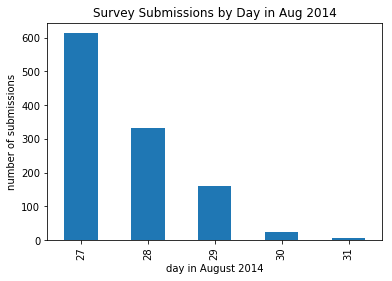

In [51]:
# using family_history (which has no NaNs as a standin for total submissions)
aug14 = df14[(df14['timestamp'].dt.year==2014)]
aug14 = aug14[(aug14['timestamp'].dt.month==8)]
submit_date_counts = aug14['family_history'].groupby(aug14['timestamp'].dt.day).count()
p = submit_date_counts.plot(kind='bar', title='Survey Submissions by Day in Aug 2014')
p.set_xlabel('day in August 2014')
p.set_ylabel('number of submissions')
# aug14_subs

Most of the survey data was collected over 2-3 days in August, 2014.

### Comments
Comments are natural language. Ignoring them for now.

In [52]:
num_comments = df14.comments.count()
print num_comments
print df14.shape[0] - num_comments
print aug14.comments.count()

164
1095
147


## Exporting Cleaned Data


In [53]:
df = pd.concat(dummy_dfs.values(), axis=1)
df = pd.concat([df14, df], axis=1)

In [54]:
df.head(2)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,phys_health_consequence_no,phys_health_consequence_yes,leave_dont_know,leave_somewhat_difficult,leave_somewhat_easy,leave_very_difficult,leave_very_easy,gender_category_female,gender_category_male,gender_category_other
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,0,1,often,6-25,...,1,0,0,0,1,0,0,1,0,0
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,0,0,rarely,1000+,...,1,0,1,0,0,0,0,0,1,0


In [55]:
df.to_csv(path_or_buf="./datasets/2014/clean-mental-health-in-tech-2014.csv")

In [56]:
df14.to_csv(path_or_buf="./datasets/2014/clean-no-dummies-2014.csv")

In [57]:
df14.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,gender_category
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,0,1,often,6-25,...,no,no,some_of_them,yes,no,maybe,yes,0,NaN,female
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,0,0,rarely,1000+,...,maybe,no,no,no,no,no,dont_know,0,NaN,male
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,0,0,rarely,6-25,...,no,no,yes,yes,yes,yes,no,0,NaN,male
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,1,1,often,26-100,...,yes,yes,some_of_them,no,maybe,maybe,no,1,NaN,male
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,0,0,never,100-500,...,no,no,some_of_them,yes,yes,yes,dont_know,0,NaN,male


In [58]:
df14['work_interfere'].value_counts(dropna=False)

sometimes    465
NaN          264
never        213
rarely       173
often        144
Name: work_interfere, dtype: int64